In [2]:
%matplotlib inline
from setup import *
from analysis.util import *
from analysis.util_plot import *
from analysis.util_virtual_resection import *


<h1>Figure S29. Distribution of synchronizability in inter-ictal periods</h1>

In [26]:
skip_chop = True
skip_mayo = False
skip_hup = False
dilate_radius = 0

all_base_sync = gather_base_sync_results(dilate_radius,'highgamma', skip_chop, skip_mayo)
print all_base_sync.keys(), map(lambda x: x.keys(), all_base_sync.values())

PATIENT_IDX = sorted(all_base_sync.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
good_pre_res = {}
good_res = {}
poor_pre_res = {}
poor_res = {}

for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All results
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)
    try:
        good_pre_res[fconn]        
    except KeyError:
        good_pre_res[fconn] = []
        good_res[fconn] = []
        poor_pre_res[fconn] = []
        poor_res[fconn] = []
    for patient_id in PATIENT_IDX:
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        if patient_id == 'HUP111A':
            continue
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        pre_res = []
        pre_non_res = []
        res = []
        non_res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = '1000'
        print first_clip_id, all_base_sync[patient_id]
        base_sync = all_base_sync[patient_id][first_clip_id]


        if outcome == 'Good':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id != '1000':
                    continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue

                base_sync = base_sync[:base_sync.shape[0]/2]
                mean_base_sync = np.nanmedian(base_sync)
                
                pre_res.append(mean_base_sync)
    
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue

                base_sync = base_sync[base_sync.shape[0]/2:]
                mean_base_sync = np.nanmedian(base_sync)
                
                res.append(mean_base_sync)

            good_pre_res[fconn].append(np.nanmedian(pre_res))
            good_res[fconn].append(np.nanmedian(res))
        if outcome == 'Poor':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id != '1000':
                    continue
#                 print patient_id, clip_id
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue

                base_sync = base_sync[:base_sync.shape[0]/2]
                mean_base_sync = np.nanmedian(base_sync)

                pre_res.append(mean_base_sync)
    
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue
                
                base_sync = base_sync[base_sync.shape[0]/2:]
                mean_base_sync = np.nanmedian(base_sync)
                
                res.append(mean_base_sync)
            poor_pre_res[fconn].append(np.nanmedian(pre_res))
            poor_res[fconn].append(np.nanmedian(res))
           


[u'HUP111A', u'HUP111B', u'Study004', u'HUP116', u'Study026', u'Study023', u'Study022', u'Study020', u'Study029', u'Study028', u'HUP094', u'HUP078', u'HUP074', u'HUP075', u'HUP073', u'HUP070', u'Study019', u'Study012', u'Study016', u'Study017', u'HUP106', u'HUP107', u'HUP105', u'HUP086', u'HUP083', u'HUP082', u'HUP080', u'HUP087', u'HUP068', u'Study033', u'HUP065', u'HUP064', u'HUP088'] [[u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000'], [u'1000']]
1000 {u'1000': array([ 0.29388659,  0.2980321 ,  0.25831708, ...,  0.46889845,
        0.36156166,  0.39116892])}
1000 {u'1000': array([ 0.45342424,  0.42252425,  0.24185508, ...,         nan,
        0.46951757,  0.30909059])}
1000 {u'1000': arr

In [27]:
poor_pre_res

{'alphatheta': [0.39444024518292453,
  0.43045175617418552,
  0.36433926755501278,
  0.49550471630891846,
  0.47137311559611283,
  0.43429197477584219,
  0.41635385573768391,
  0.41968764646956586,
  0.50101515145096442,
  0.51970703610523017,
  0.46318111304477466],
 'beta': [0.53053225536579673,
  0.52812896436910828,
  0.50044313884317648,
  0.53406812576394636,
  0.52407382235054334,
  0.3823860009907909,
  0.42387633188160428,
  0.47218167346254014,
  0.50566099674500831,
  0.5145358148676511,
  0.50873985468819893],
 'broadband_CC': [0.58269148097096202,
  0.60515362018792751,
  0.54957773854957104,
  0.52985013201998776,
  0.62790605451753712,
  0.60101512398876267,
  0.57418372571949761,
  0.63026920816924981,
  0.69792101465847911,
  0.68950451208097574,
  0.64535703284149659],
 'highgamma': [0.51898802695914181,
  0.31560791647514441,
  0.45810190126636452,
  0.30488436598205759,
  0.42080936721695067,
  0.37191836158096037,
  0.25914054429486533,
  0.43143341817193737,
  0.5

Alpha/Theta:
 5-15 Hz pre -0.493923989341 0.621359861767 -0.235026930773
Alpha/Theta:
 5-15 Hz post -0.258722089655 0.79584967464 -0.203791752601
Beta:
 15-25 Hz pre -0.87024702884 0.384165420205 -0.195918593429
Beta:
 15-25 Hz post -0.635045129153 0.525398982181 -0.233922232053
Low Gamma:
 30-40 Hz pre 0.446883609404 0.654959098972 -0.111184872565
Low Gamma:
 30-40 Hz post 0.0705605699059 0.943747492813 -0.13542085911
High Gamma:
 95-105 Hz pre 1.81105462759 0.0701323959952 0.648136597141
High Gamma:
 95-105 Hz post 1.5758527279 0.115059747433 0.692126936931
Very High:
 105-256+ Hz pre 1.48177196802 0.138400980263 0.545027419101
Very High:
 105-256+ Hz post 1.1995296884 0.230322047898 0.439311070453
Broadband
 Cross-Correlation pre -0.117600949843 0.906383852304 -0.153479783855
Broadband
 Cross-Correlation post 0.117600949843 0.906383852304 -0.111793707149


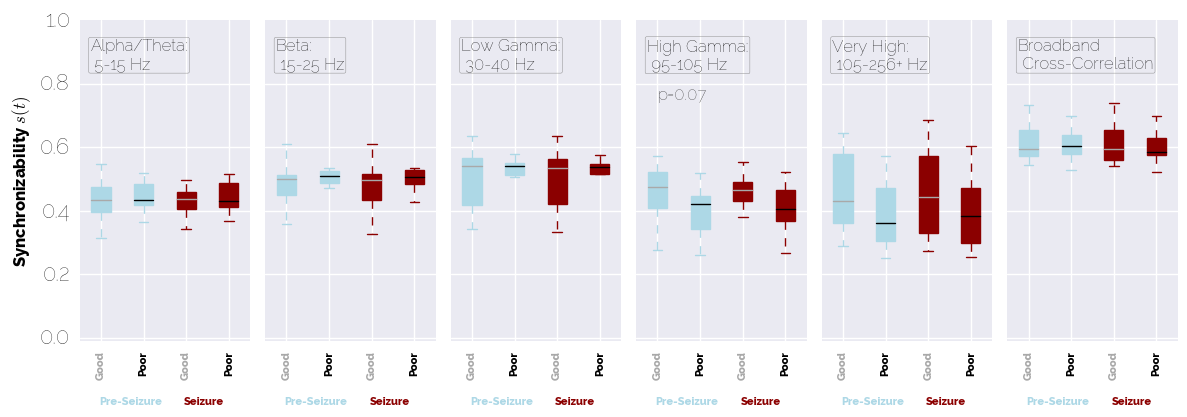

In [28]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 1.0
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.75

# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Synchronizability $s(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]])
    draw_plot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(good_pre_res[fconn], poor_pre_res[fconn])
    cd = cohen_d(good_pre_res[fconn], poor_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(good_res[fconn], poor_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
# plt.show()
fig.savefig('%s/../fig/FigureS29.png'%(comp_dir))



<h1>Figure S30. Synchronizability of Time-Varying Functional Networks </h1>

0.0515 0.0 0.289256198347
0.0889 0.0 0.49173553719
0.093 0.0 0.48347107438
0.4423 0.0 0.607438016529
0.5532 0.0 0.54958677686
0.077 0.0 0.404958677686


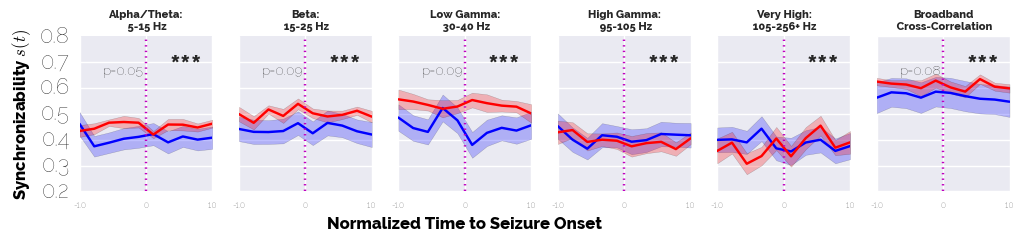

In [29]:
width = 10

# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 1.0
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.95



fig,axs = plt.subplots(1,6,sharey=True, sharex=True)
fig.set_size_inches((12,2))

for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)        
    all_base_sync = get_norm(all_base_sync, width=width)
    
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    pt_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        if patient_id == 'HUP111A':
            continue
        if(skip_chop and 'CHOP' in patient_id):
            continue
        if(skip_mayo and 'Study' in patient_id):
            continue
        if(skip_hup and 'HUP' in patient_id):
            continue
        if not all_base_sync[patient_id]:
            continue

        index_col.append(patient_id)
        row_data = np.array((pt_iter+1,))    
        for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):                    
            if(pid != patient_id):
                continue
            outcome = data['PATIENTS'][patient_id]['Outcome']

            avg_data = np.array(())                    
            for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                if clip != '1000':
                    continue
                res = clip_data                        
                if(res.shape[0] == num_fts+1):
                    res = res[:num_fts]
                try:                
                    avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                except Exception:                
                    avg_data = np.reshape(res,(num_fts,1))                    
            avg_data = np.nanmedian(avg_data,axis=1)

            # Update row_data
            row_data = np.hstack((row_data,avg_data)) 

            # Update header
            if(pt_iter == 0):
                for t in range(1,num_fts+1):
                    out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
        if(get_outcome(outcome) == 'Good'):        
            row_data = np.hstack((row_data,[0]))        
        else:
            row_data = np.hstack((row_data,[1]))
        if(row_data.shape[0] != num_fts+2):
            continue
        ft_matrix[pt_iter,:] = row_data
        pt_iter += 1
    
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')

    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')







    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Synchronizability $s(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
        ax.set_xlabel('Normalized Time to Seizure Onset',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'
    
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0),'b')
    ax.hold(True)
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmedian(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0), 'r')
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmedian(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    ax.set_xlim(( -1.0, 1.0))    
    ax.set_ylim((0.2, 0.8))
    ax.plot([0,0],[0.2,0.8],color='m',linestyle=':')
    ax.set_yticks(np.arange(0.2,0.8,0.1))
    
    ax.set_xticks([-1.0,0,1.0])
    ax.set_xticklabels([-1.0,0,1.0],fontdict={'size':6,'weight':'normal'})

    ax.set_title(title,fontdict={'size':8,'weight':'bold'})    
    
    ax.grid(True)
    
    # Make significance indicators

    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:width/4.0*3.0],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        ax.text(-0.65,0.65, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        ax.text(-0.65,0.65, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        ax.text(-0.65,0.65, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        ax.text(-0.65,0.65, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':10})
    
    if post_p < 0.001:
        ax.text(0.35,0.65, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        ax.text(0.35,0.65, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        ax.text(0.35,0.65, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        ax.text(0.35,0.65, 'p=%0.2f'%post_p,{'weight':'normal', 'size':12})

    print pre_p, post_p, roc_auc

plt.savefig('../../fig/FigureS30.png',bbox_inches='tight', format='png', dpi=1200)
# plt.show()

<h1>Figure S31. ROC Cuve of using Change in synchronizability as a feature </h1>

alphatheta 0.446883609404 0.654959098972
0.449197860963
beta -0.446883609404 0.654959098972
0.550802139037
lowgamma 0.493923989341 0.621359861767
0.44385026738
highgamma -0.16464132978 0.869226298639
0.51871657754
veryhigh -0.258722089655 0.79584967464
0.529411764706
broadband_CC -1.38769120815 0.165231094343
0.657754010695
alphatheta 0.449197860963
beta 0.550802139037
lowgamma 0.44385026738
highgamma 0.51871657754
veryhigh 0.529411764706
broadband_CC 0.657754010695


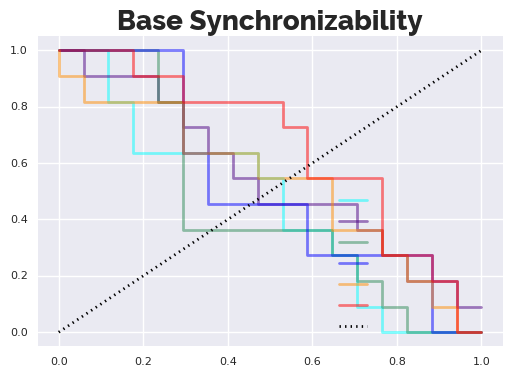

In [30]:
fig,axs = plt.subplots(1,1)
ax = axs
fig.set_size_inches((6,4))

width = 10
all_features = []
roc_results = []
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)
    all_base_sync = get_norm(all_base_sync, width=width)
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    
    
    all_data = np.array(())

    for patient_id in sorted(patient_idx):
            if patient_id == 'HUP111A':
                continue
            if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
                continue
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_base_sync[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome'] 
                
                avg_data = np.array(())
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    if clip != '1000':
                        continue
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                #%DEBUG
#                     print patient_id, clip, avg_data.shape
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.append([clip_iter+1],avg_data)
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                # Update header
                if(clip_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                if(get_outcome(outcome) == 'Good'):        
                    row_data = np.append(row_data,[0])        
                else:
                    row_data = np.append(row_data,[1])
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                try:
                    all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                except Exception:
                    all_data = row_data
                clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    good_outcome_feature = np.nanmedian(all_data[outcomex==0,width/2:],axis=1)-np.nanmedian(all_data[outcomex==0,:width/2],axis=1)
    poor_outcome_feature = np.nanmedian(all_data[outcomex==1,width/2:],axis=1)-np.nanmedian(all_data[outcomex==1,:width/2],axis=1)
    all_features.append(good_outcome_feature)
    all_features.append(poor_outcome_feature)
    s,p = scipy.stats.ranksums(good_outcome_feature, poor_outcome_feature)
    print fconn, s,p
    if p < 0.05:
        print fconn, s,p
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
#     tpr = np.loadtxt('FigureS30_%s_sensitivity.csv'%fconn)
#     fpr = np.loadtxt('FigureS30_%s_specificity.csv'%fconn)
    fpr = 1-fpr
    roc_auc = auc(fpr,tpr)
    print roc_auc
    roc_results.append((fconn,roc_auc,fpr,tpr))
#     np.savetxt('FigureS30_%s_outcomex.csv'%fconn,outcomex)
#     np.savetxt('FigureS30_%s_threshold.csv'%fconn,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))
    
# ax.boxplot(all_features)

# ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
# ax.set_xticklabels(['Good','Poor','Good','Poor','Good','Poor','Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
# ax.set_ylim([-0.3,0.05])
# for ii in range(1,10,2):
#     ax.get_xticklabels()[ii].set_color('black')
# for ii in range(0,10,2):
#     ax.get_xticklabels()[ii].set_color('darkgray')
# ax.text(0.75,-0.25,'Alpha/Theta:\n 5-15 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(2.75,-0.25,'Beta:\n 15-25 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(4.75,-0.25,'Low Gamma:\n 30-40 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(6.75,-0.25,'High Gamma:\n 95-105 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(8.75,-0.25,'Broadband\n Cross-\nCorrelation',fontdict={'size':10,'weight':'normal'})
# ax.set_ylabel('Change in Synchronizability \n(pre-ictal to ictal)',fontdict={'size':14,'weight':'bold'})

# ax = axs[1]
colors = ['cyan', 'indigo', 'seagreen', 'blue', 'darkorange', 'red']
i = 0
for fconn, roc_auc, fpr, tpr in roc_results:
#     ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '%s (%0.2f)'%(fconn,roc_auc), alpha=0.5)
    ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '                       ', alpha=0.5)
    print fconn, roc_auc
    ax.hold(True)
    i += 1
# Plot the ROC curve for luck along with area
ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='k', label=' ')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

# ax.set_xlabel('1 - Specificity',fontdict={'size':14,'weight':'bold'})
# ax.set_ylabel('Sensitivity',fontdict={'size':14,'weight':'bold'})
ax.set_xticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0],fontdict={'size':8,'family':'normal'})
ax.set_yticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0],fontdict={'size':8,'family':'normal'})
ax.legend(loc="lower right",prop={'size':10,'weight':'bold', 'family':'normal'})

# plt.show()
plt.title('Base Synchronizability',fontdict={'size':20})
# plt.savefig('../../fig/FigureS30.svg',bbox_inches='tight', format='svg', dpi=1200)
plt.savefig('../../fig/FigureS31.png',bbox_inches='tight', format='png', dpi=1200)

<h1>Figure S32. Borrowed from S10 - S12</h1>

In [31]:
run_stereotype_only = False
all_nodal_results = gather_nodal_results(fconn='highgamma')
PATIENT_IDX = sorted(all_nodal_results.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
good_pre_res = {}
good_res = {}
poor_pre_res = {}
poor_res = {}

for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All nodal results
    all_nodal_results = gather_nodal_results(fconn=fconn)
    
    
    try:
        good_pre_res[fconn]        
    except KeyError:
        good_pre_res[fconn] = []
        good_res[fconn] = []
        poor_pre_res[fconn] = []
        poor_res[fconn] = []
    for patient_id in sorted(PATIENT_IDX):
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        if patient_id == 'HUP111A':
            continue
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        pre_res = []
        res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
        nodal_control_centrality = all_nodal_results[patient_id][first_clip_id]
        resected_node_idx, non_resected_node_idx, channels = get_resected_node_dx(patient_id)

        if outcome == 'Good':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id != '1000':
                    continue
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                pre_res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))
    
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))


            good_pre_res[fconn].append(np.nanmedian(pre_res))
            good_res[fconn].append(np.nanmedian(res))
        if outcome == 'Poor':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id != '1000':
                    continue
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
#                 print patient_id, clip_id
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)

                pre_res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))

                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue
                
                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))
                
            poor_pre_res[fconn].append(np.nanmedian(pre_res))
            poor_res[fconn].append(np.nanmedian(res))
            

In [32]:
poor_res

{'alphatheta': [0.0036332033472694599,
  0.0014921278528265854,
  -0.0018799569542266358,
  0.0039695524984439297,
  -0.0010653071945967193,
  -0.014930601623833431,
  -8.5555417814026422e-05,
  -0.00096648602382303297,
  -0.0018822510841503054,
  -0.0023611181561219601,
  0.0036294724546949327],
 'beta': [0.0018448127202206825,
  -0.0014649100294254203,
  -0.0027440321042815838,
  0.003188822501030788,
  -0.002996390632925461,
  -0.026102914221474965,
  -0.00088505391637902075,
  -0.0040172587857645724,
  -0.0031376118021928154,
  -0.0045578015999123769,
  -0.0014796759966394951],
 'broadband_CC': [0.0047368348355328847,
  0.00077283495788031936,
  -0.00071583230196940869,
  0.0029770372403026429,
  -0.00072948744918597467,
  -0.010444721022465318,
  -0.00010087042975603198,
  -0.00094609729443439366,
  -0.0010021749859098407,
  -0.0019197490801545856,
  -0.00080664878900511372],
 'highgamma': [1.8376295674464484e-05,
  0.00095415422700118556,
  -0.002839447982027077,
  0.004425747086

Alpha/Theta:
 5-15 Hz pre 0.776166268965 0.437650819576 0.542272092678
Alpha/Theta:
 5-15 Hz post 0.87024702884 0.384165420205 0.509356639597
Beta:
 15-25 Hz pre 1.43473158809 0.151363599187 0.610230652179
Beta:
 15-25 Hz post 1.81105462759 0.0701323959952 0.667466417968
Low Gamma:
 30-40 Hz pre 1.29361044828 0.195800011643 0.637010005705
Low Gamma:
 30-40 Hz post 1.1995296884 0.230322047898 0.597034094055
High Gamma:
 95-105 Hz pre 0.635045129153 0.525398982181 0.444435175572
High Gamma:
 95-105 Hz post 0.258722089655 0.79584967464 0.413251919858
Very High:
 105-256+ Hz pre -1.76401424765 0.0777295804624 -0.791180304144
Very High:
 105-256+ Hz post -1.5758527279 0.115059747433 -0.585641247282
Broadband
 Cross-Correlation pre 0.588004749216 0.556529105076 0.421635214443
Broadband
 Cross-Correlation post 0.964327788714 0.334881613081 0.558110275598


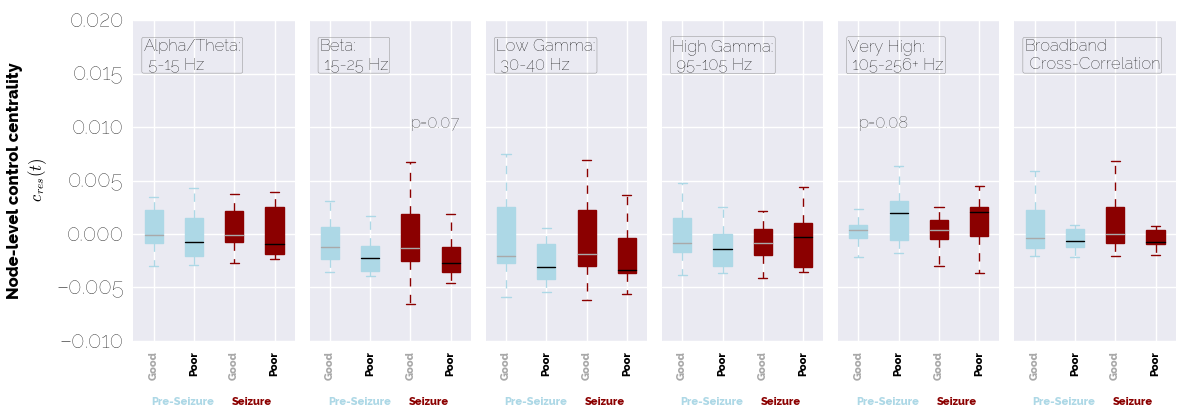

In [33]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.01


# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level control centrality\n $c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]])
    draw_plot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(good_pre_res[fconn], poor_pre_res[fconn])
    cd = cohen_d(good_pre_res[fconn], poor_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(good_res[fconn], poor_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
# plt.show()
if run_stereotype_only:
#     blah
    fig.savefig('%s/../fig/FigureS32_mean_stero.png'%(comp_dir))
else:
    fig.savefig('%s/../fig/FigureS32.png'%(comp_dir))



<h1>Figure S33. </h1>

In [34]:
run_stereotype_only = False
width = 10
all_freq_nodal_results = {}
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    all_freq_nodal_results[fconn] = gather_resection_norm_nodal_results(fconn=fconn,width=width)

In [35]:
all_freq_nodal_results['highgamma']

{u'HUP064': {u'1': array([ -4.09818302e-03,  -4.03494613e-03,  -3.80485214e-03,
          -4.63275417e-04,  -2.43629276e-03,  -2.34212477e-03,
          -5.86432022e-04,   1.14174555e-02,  -1.13353024e-03,
           8.02741063e-05]),
  u'1000': array([ 0.01109703,  0.00493512, -0.0033687 , -0.0031977 , -0.00543588,
          0.00252744, -0.00191716, -0.00206201, -0.00044899, -0.0033557 ])},
 u'HUP065': {u'1': array([-0.00359437, -0.00205631, -0.00177938, -0.00577494,  0.00111917,
          0.01042763,  0.0045771 , -0.00413357, -0.00732342, -0.00437705]),
  u'1000': array([-0.0028708 , -0.00549005,  0.00085319,  0.00445924,  0.00482249,
         -0.00311555,  0.00339005,  0.00036147,  0.00370012, -0.002552  ]),
  u'2': array([-0.00396799,  0.00118756, -0.00400628, -0.00237188, -0.00043355,
          0.01032628,  0.00805558,  0.00769942,  0.013219  ,  0.01516544]),
  u'3': array([-0.00010256, -0.00034713, -0.00472736, -0.0020072 ,  0.00063253,
         -0.00261876,  0.00024508,  0.00063

0.1773 0.0 0.331550802139
0.1814 0.0 0.347593582888
0.1128 0.0 0.566844919786
0.2375 0.0 0.44385026738
0.1906 0.0 0.529411764706
0.2465 0.0 0.31550802139


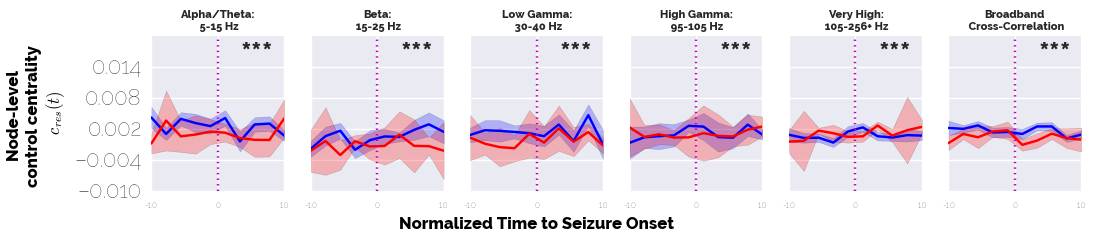

In [ ]:


# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.015

fig,axs = plt.subplots(1,6,sharey=True, sharex=True)
fig.set_size_inches((12,2))

for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
#     all_nodal_results = gather_resection_norm_nodal_results(fconn=fconn,width=width)
    all_nodal_results = all_freq_nodal_results[fconn]
    num_fts = width

    pt_iter = 0
    patient_idx = all_nodal_results.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    
    
    for patient_id in sorted(patient_idx):
        if patient_id == 'HUP111A':
            continue
        if(skip_chop and 'CHOP' in patient_id):
            continue
        if(skip_mayo and 'Study' in patient_id):
            continue
        if(skip_hup and 'HUP' in patient_id):
            continue

        index_col.append(patient_id)
        row_data = np.array((pt_iter+1,))    
        for pid,clips in sorted(all_nodal_results.items(), key=lambda x:x[0]):                    
            if(pid != patient_id):
                continue
            outcome = data['PATIENTS'][patient_id]['Outcome']

            avg_data = np.array(())                 
            for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):

                if clip != '1000':
                    continue
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
                res = clip_data                        
                if(res.shape[0] == num_fts+1):
                    res = res[:num_fts]
                try:                
                    avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                except Exception:                
                    avg_data = np.reshape(res,(num_fts,1))                    

            avg_data = np.nanmedian(avg_data,axis=1)

            # Update row_data
            row_data = np.hstack((row_data,avg_data)) 

            # Update header
            if(pt_iter == 0):
                for t in range(1,num_fts+1):
                    out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
        if(get_outcome(outcome) == 'Good'):        
            row_data = np.hstack((row_data,[0]))        
        else:
            row_data = np.hstack((row_data,[1]))
        if(row_data.shape[0] != num_fts+2):
            continue
        ft_matrix.append(row_data)
        pt_iter += 1

    ft_matrix = np.array(ft_matrix)
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')

    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')

    font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 32}
    matplotlib.rc('font', **font)
    matplotlib.rcParams['axes.titlesize'] = 36
    matplotlib.rcParams['axes.titleweight'] = 'bold'
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.labelweight'] = 'bold'
    matplotlib.rcParams['ytick.labelsize'] = 16
    matplotlib.rcParams['xtick.labelsize'] = 16
    matplotlib.rcParams['axes.labelcolor'] = 'black'

    
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level \ncontrol centrality \n $c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
        ax.set_xlabel('Normalized Time to Seizure Onset',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'
    
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0),'b')
    ax.hold(True)
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmedian(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0), 'r')
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmedian(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    ax.set_xlim(( -1.0, 1.0))    
    ax.set_ylim((min_y, max_y))
    ax.plot([0,0],[min_y,max_y],color='m',linestyle=':')
    ax.set_yticks(np.arange(min_y,max_y,(max_y-min_y)/5.0))
    
    ax.set_xticks([-1.0,0,1.0])
    ax.set_xticklabels([-1.0,0,1.0],fontdict={'size':6,'weight':'normal'})

    ax.set_title(title,fontdict={'size':8,'weight':'bold'})    
    
    ax.grid(True)
    
    # Make significance indicators

    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        ax.text(-0.65,star_y, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        ax.text(-0.65,star_y, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        ax.text(-0.65,star_y, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        ax.text(-0.65,star_y, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':22})
    
    if post_p < 0.001:
        ax.text(0.35,star_y, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        ax.text(0.35,star_y, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        ax.text(0.35,star_y, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        ax.text(0.35,star_y, 'p=%0.2f'%post_p,{'weight':'normal', 'size':22})

    print pre_p, post_p, roc_auc

if run_stereotype_only:
#     blah
    plt.savefig('../../fig/FigureS33_stereo.png',bbox_inches='tight', format='png', dpi=1200)
else:
    plt.savefig('../../fig/FigureS33.png',bbox_inches='tight', format='png', dpi=1200)
# plt.show()

<h1>Figure S34. </h1>

In [ ]:
run_stereotype_only = False
width = 10
all_freq_nodal_results = {}
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    all_freq_nodal_results[fconn] = gather_resection_norm_nodal_results(fconn=fconn,width=width)

In [ ]:
fig,axs = plt.subplots(1,1)
ax = axs
fig.set_size_inches((6,4))


all_features = []
roc_results = []
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_nodal_results = all_freq_nodal_results[fconn]
    width = len(map(lambda x: x.values(), all_nodal_results.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_nodal_results.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_nodal_results.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    
    
    all_data = np.array(())

    for patient_id in sorted(patient_idx):
            if patient_id == 'HUP111A':
                continue
#             print patient_id
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_nodal_results.items(), key=lambda x:x[0]):
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome'] 
                
                avg_data = np.array(())
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    if clip != '1000':
                        continue
                    if run_stereotype_only:
                        common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != common_stype:
                            continue
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                #%DEBUG
#                     print patient_id, clip, avg_data.shape
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.append([clip_iter+1],avg_data)
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                # Update header
                if(clip_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                if(get_outcome(outcome) == 'Good'):        
                    row_data = np.append(row_data,[0])        
                else:
                    row_data = np.append(row_data,[1])
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                try:
                    all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                except Exception:
                    all_data = row_data
                clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    good_outcome_feature = np.nanmedian(all_data[outcomex==0,width/2:],axis=1)-np.nanmedian(all_data[outcomex==0,:width/2],axis=1)
    poor_outcome_feature = np.nanmedian(all_data[outcomex==1,width/2:],axis=1)-np.nanmedian(all_data[outcomex==1,:width/2],axis=1)
    
    all_features.append(good_outcome_feature)
    all_features.append(poor_outcome_feature)
    s,p = scipy.stats.ranksums(good_outcome_feature, poor_outcome_feature)
    print fconn, s,p
    if p < 0.05:
        print fconn, s,p
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
#     if run_stereotype_only:
#         tpr = np.loadtxt('FigureS34_stereo_%s_sensitivity.csv'%fconn)
#         fpr = np.loadtxt('FigureS34_stereo_%s_specificity.csv'%fconn)
#         fpr = 1-fpr
#     else:
#         tpr = np.loadtxt('FigureS34_%s_sensitivity.csv'%fconn)
#         fpr = np.loadtxt('FigureS34_%s_specificity.csv'%fconn)
#         fpr = 1-fpr
    roc_auc = auc(fpr,tpr)
    print roc_auc
    
    roc_results.append((fconn,roc_auc,fpr,tpr))
#     if run_stereotype_only:
#         np.savetxt('FigureS34_stereo_%s_outcomex.csv'%fconn,outcomex)
#         np.savetxt('FigureS34_stereo_%s_threshold.csv'%fconn,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))
#     else:
#         np.savetxt('FigureS34_%s_outcomex.csv'%fconn,outcomex)
#         np.savetxt('FigureS34_%s_threshold.csv'%fconn,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))

# ax = axs[1]
colors = ['cyan', 'indigo', 'seagreen', 'blue', 'darkorange', 'red']
i = 0
for fconn, roc_auc, fpr, tpr in roc_results:
#     ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '%s (%0.2f)'%(fconn,roc_auc), alpha=0.5)
    ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '                       ', alpha=0.5)
    print fconn, roc_auc
    ax.hold(True)
    i += 1
# Plot the ROC curve for luck along with area
ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='k', label=' ')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

# ax.set_xlabel('1 - Specificity',fontdict={'size':14,'weight':'bold'})
# ax.set_ylabel('Sensitivity',fontdict={'size':14,'weight':'bold'})
ax.set_xticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0],fontdict={'size':8,'family':'normal'})
ax.set_yticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0],fontdict={'size':8,'family':'normal'})
ax.legend(loc="lower right",prop={'size':10,'weight':'bold', 'family':'normal'})
# plt.show()
plt.title('Node-level control centrality',fontdict={'size':20})
if run_stereotype_only:
    plt.savefig('../../fig/FigureS34.png',bbox_inches='tight', format='png', dpi=1200)
else:
    plt.savefig('../../fig/FigureS34.png',bbox_inches='tight', format='png', dpi=1200)